<a href="https://colab.research.google.com/github/imsidharthj/Fastai/blob/main/Fastai_lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [1]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [2]:
quad(3, 2, 1, 1.5)

10.75

In [3]:
from functools import partial

In [4]:
def mk_quad(a,b,c): return partial(quad, a,b,c) # applied partial beacuse we want to fix the value of a, b, c

In [5]:
f = mk_quad(3,2,1)
f(1.5)

10.75

In [8]:
import numpy as np
from numpy.random import normal, seed, uniform
np.random.seed(42)
def noise(x, scale) : return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)

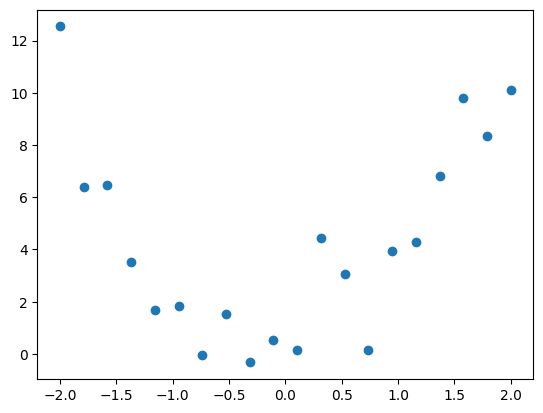

In [10]:
import torch
import matplotlib.pyplot as plt
x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x, y);

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

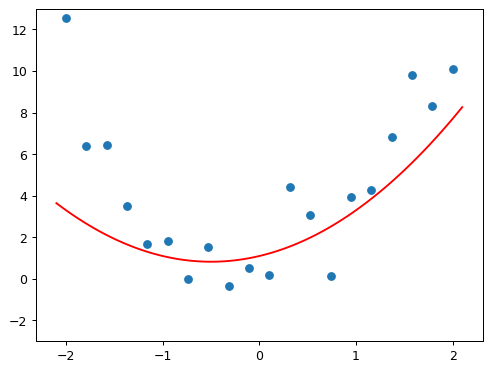

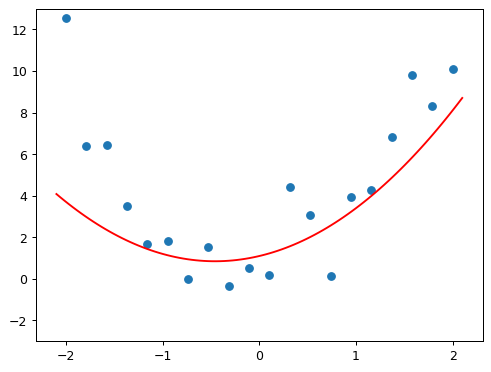

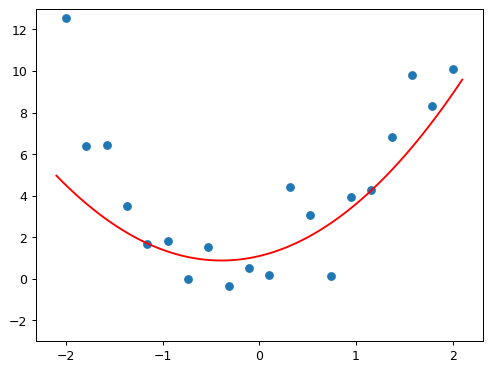

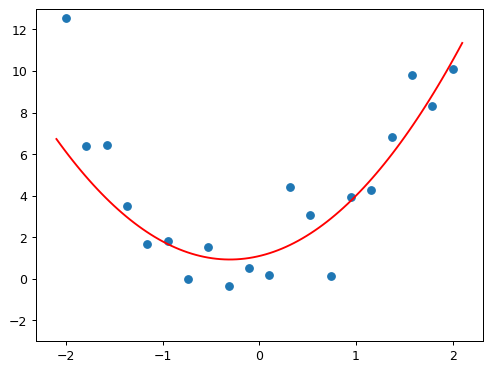

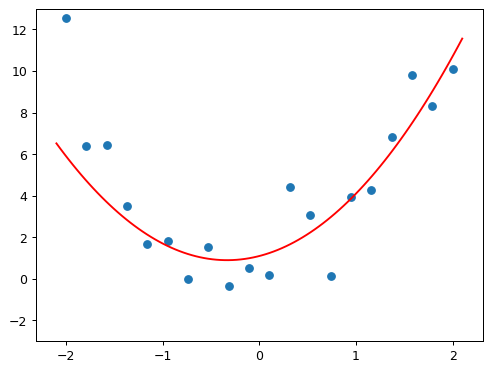

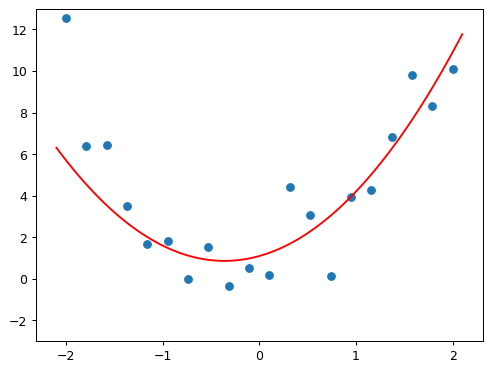

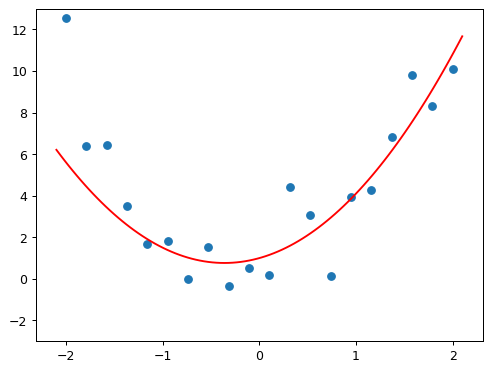

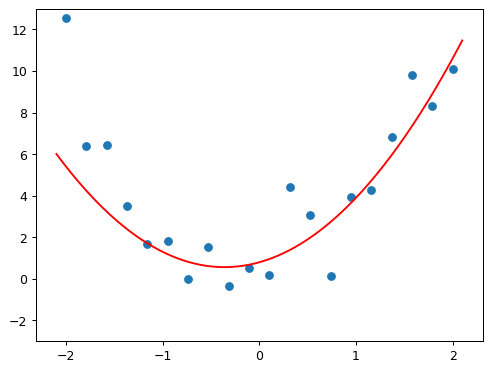

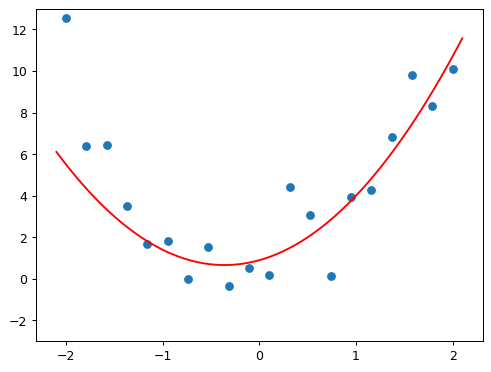

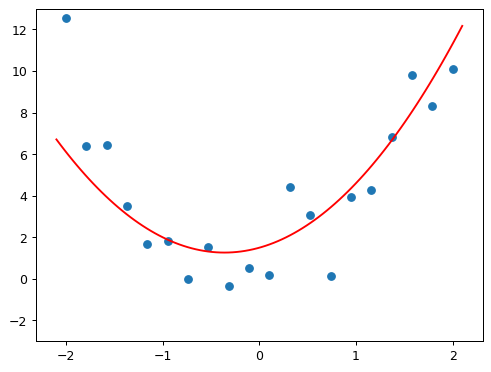

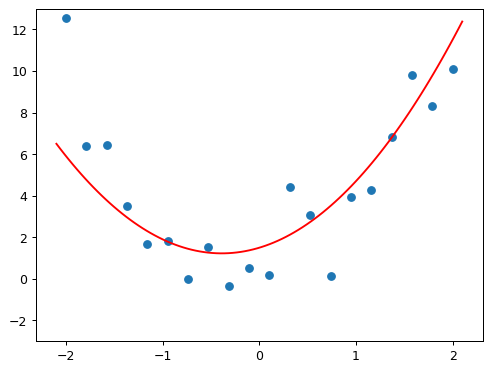

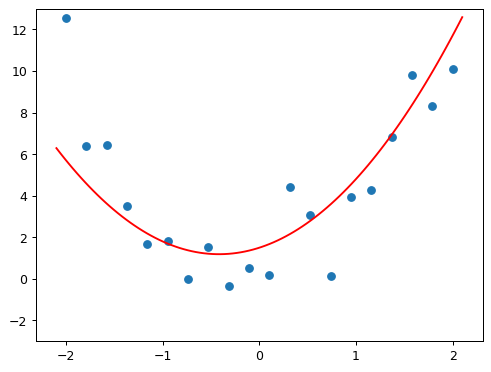

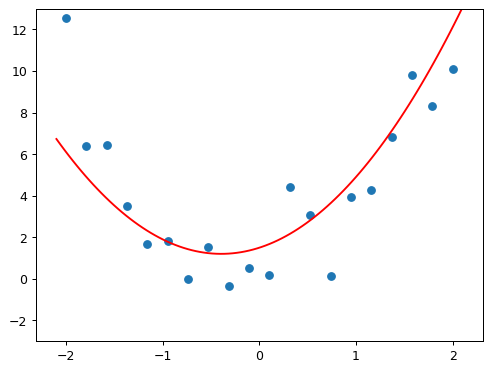

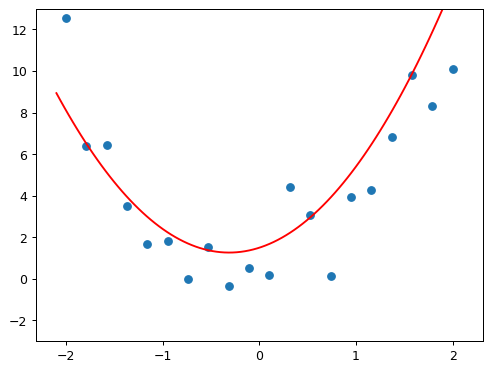

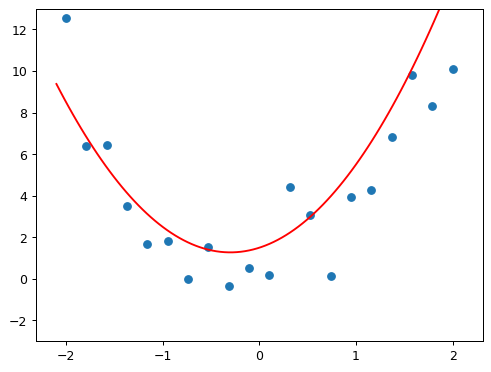

In [14]:
from ipywidgets import interact
import matplotlib.pyplot as plt
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

In [16]:
def mae(preds, acts): return ((preds-acts)**2).mean()

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

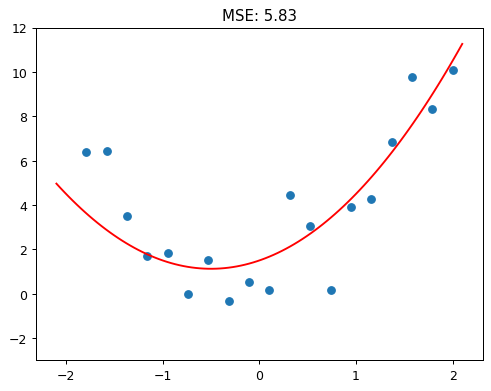

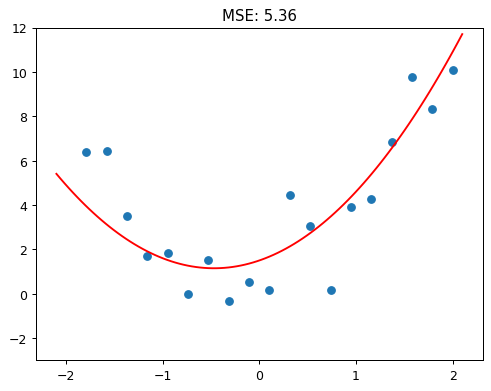

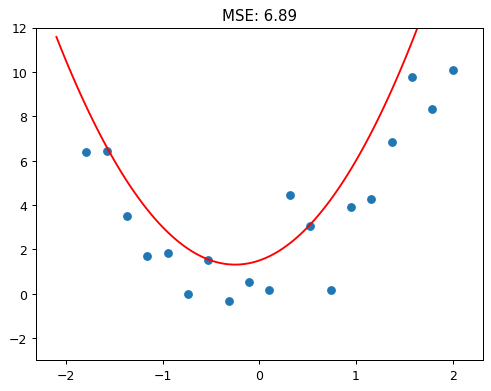

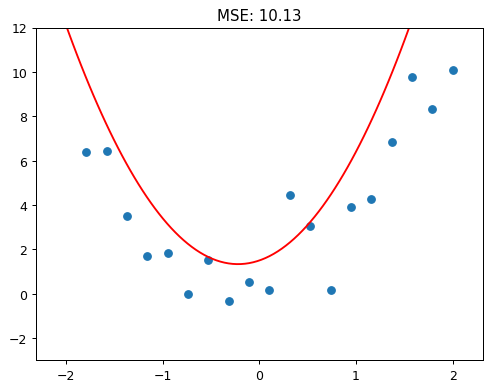

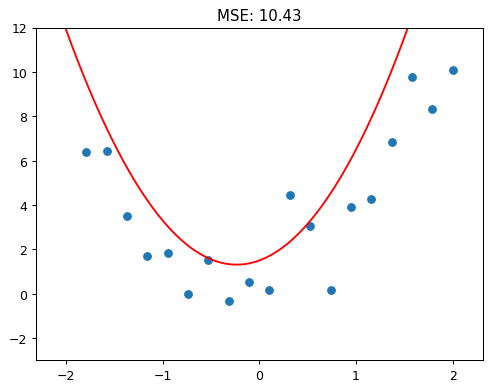

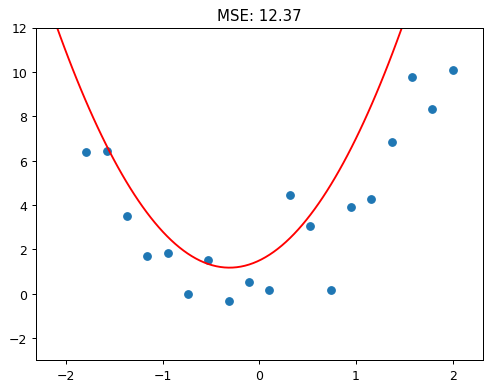

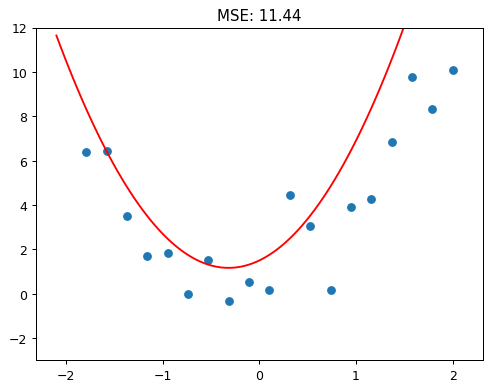

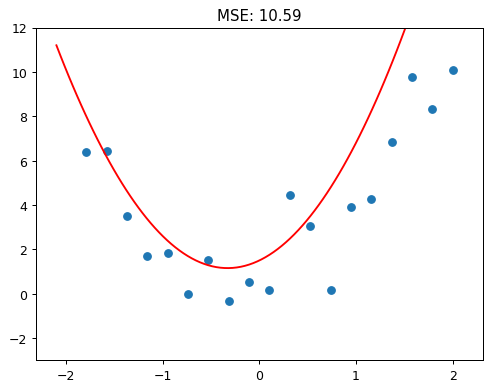

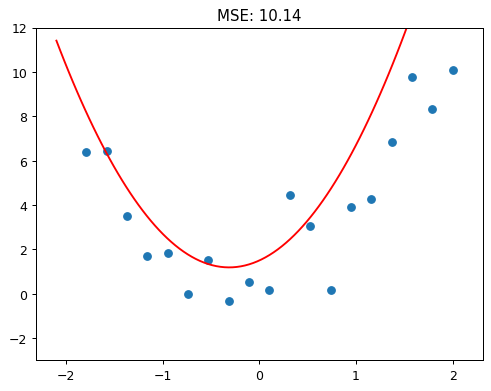

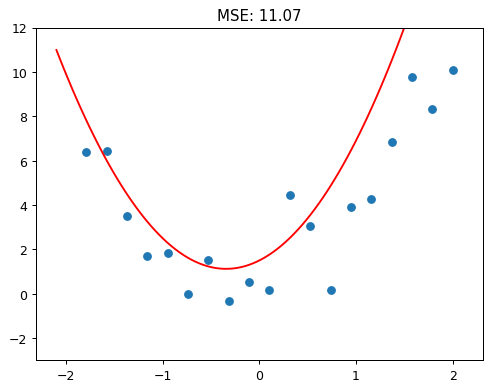

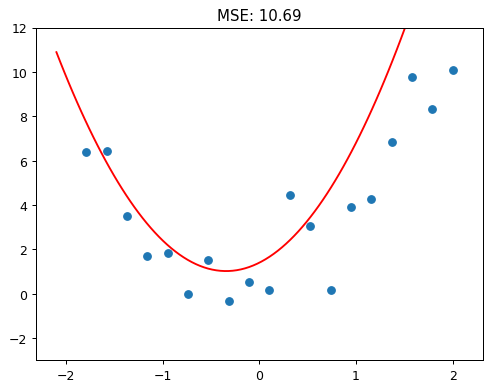

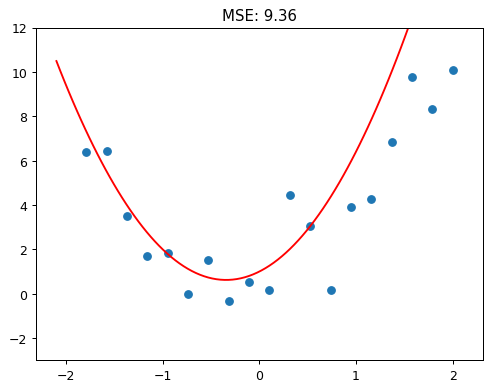

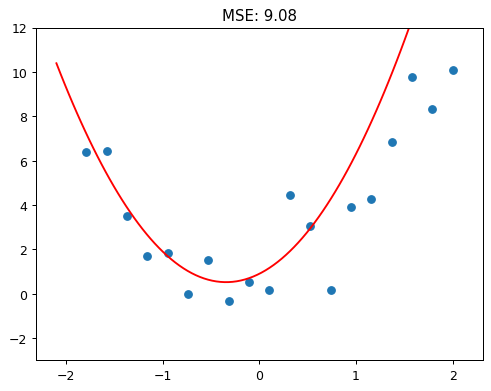

In [17]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MSE: {loss:.2f}")

In [18]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [19]:
quad_mae([1.5, 1.5, 1.5])

tensor(5.8336, dtype=torch.float64)

In [20]:
abc = torch.tensor([1.5,1.5,1.5])

In [21]:
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [22]:
loss = quad_mae(abc)
loss

tensor(5.8336, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [23]:
loss.backward()

In [24]:
abc.grad

tensor([-5.1419,  2.8472, -1.1009])

In [25]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)

print(f'loss={loss:.2f}')

loss=5.49


In [26]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=5.49
step=1; loss=4.90
step=2; loss=4.23
step=3; loss=3.67
step=4; loss=3.33
step=5; loss=3.28
step=6; loss=3.47
step=7; loss=3.77
step=8; loss=4.05
step=9; loss=4.18


In [27]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

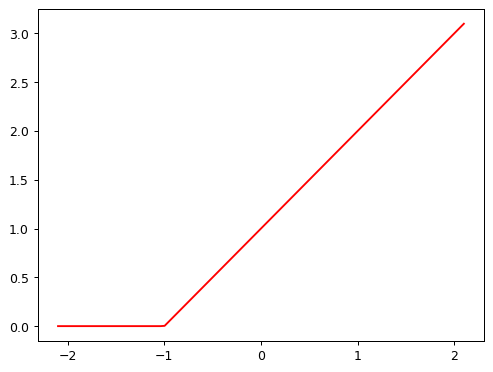

In [28]:
plot_function(partial(rectified_linear, 1,1))

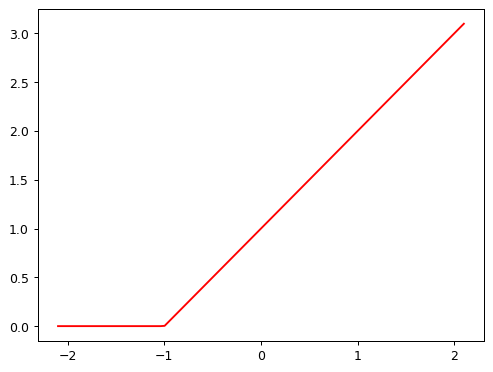

In [29]:
import torch.nn.functional as F
def rectified_linear2(m,b,x): return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,1))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

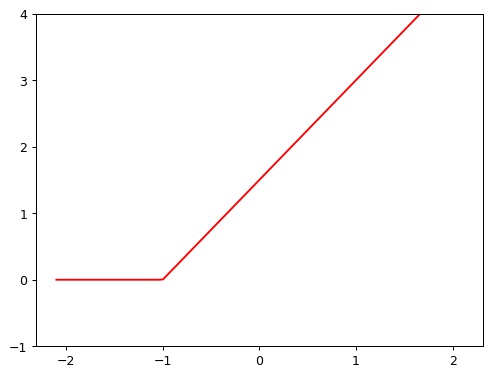

In [30]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

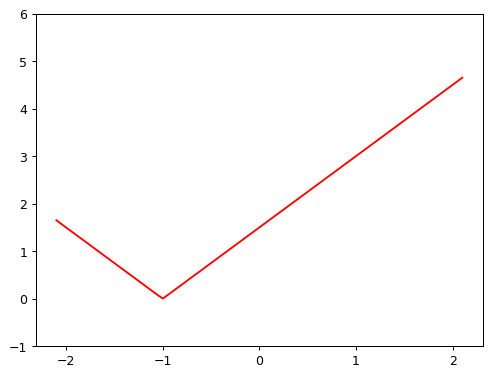

In [31]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))